<a href="https://colab.research.google.com/github/chajunhyeop/-/blob/main/ubion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#상관관계분석



In [1]:
#pingouin은 pandas 와 numpy를 기반으로 한 오픈소스 통계 패기지 
#분산분석(anova), pairwise 사후검정, pairwise 상관관계 선형회귀, 로지스틱회귀, 매개분석, 다변량테스트, 신뢰성과 일관성 검정 , 효과 크기 및 검정력 분석
!pip install pingouin
!pip install scikit_posthocs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:

import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic")
import pandas as pd
import numpy as np
import math
import sklearn.preprocessing 
from scipy import stats
import pingouin as pg
import scikit_posthocs
import scipy as sp
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping2.csv", encoding='cp949') #encoding = "utf-8"

In [5]:
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [6]:
df1 = df2[['총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액', '고객등급']]

In [7]:
df1.corr(method = "pearson")

,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급
총_매출액,1.000000,0.631171,0.314133,-0.010340,-0.004880,-0.168059
방문빈도,0.631171,1.000000,-0.279690,0.019787,0.044814,-0.248571
1회_평균매출액,0.314133,-0.279690,1.000000,-0.003491,-0.018000,0.143862
할인권_사용 횟수,-0.010340,0.019787,-0.003491,1.000000,0.848666,-0.053254
총_할인_금액,-0.004880,0.044814,-0.018000,0.848666,1.000000,-0.013872
고객등급,-0.168059,-0.248571,0.143862,-0.053254,-0.013872,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


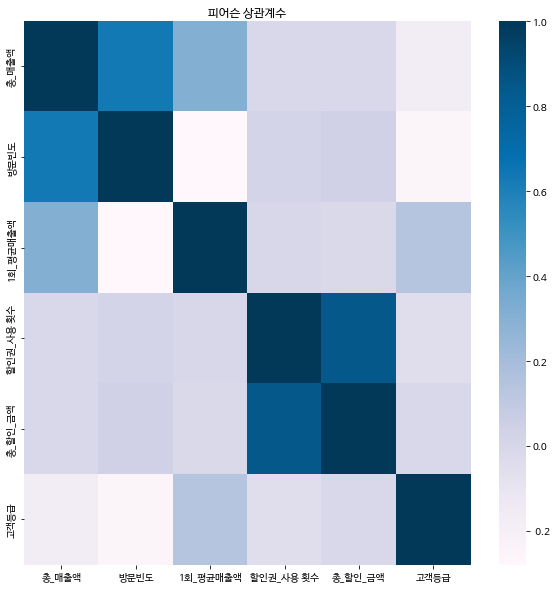

In [13]:
#사용 강력 추천
colormap = plt.cm.PuBu
plt.figure(figsize=(10,10))
plt.title("피어슨 상관계수")
sns.heatmap(df1.astype(float).corr(),cmap=colormap)

#주성분분석

In [51]:
#주성분분석 패키지
from sklearn.decomposition import PCA 

In [15]:
df=df2

In [16]:
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [18]:
df.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
dtype: int64

In [22]:
df= df.dropna(axis=0) #dropna 작동 불가 시 옵션 implace = True 추가
df.isnull().sum()

고객ID                0
이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용 횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

In [23]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [28]:
#총 매출액은 종속변수 y로 하기 위해 feature변수에 총_매출액을 제외한 열이름 할당
feature = ['고객ID', '이탈여부', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
           '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
          '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
          'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
           '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
           '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성']

In [48]:
x = df.drop(["총_매출액"],axis = 1).values
x1 = df.drop(["총_매출액"],axis = 1)
y = df["총_매출액"].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(x, columns=feature)
#pd.dataframe(data, index, columns, dtype, copy)

,고객ID,이탈여부,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,-1.732022,-0.267091,-0.441573,-0.349867,-1.802715,-2.584469,-0.606201,0.906277,-0.907907,0.728382,...,0.304803,1.359596,0.388037,0.248061,0.369038,0.709074,0.575894,0.365703,0.635247,0.673617
1,-1.721671,-0.267091,-0.441573,0.137952,-1.802715,-2.586715,-0.606201,0.906277,1.101434,-0.110754,...,0.304803,0.189258,-0.977399,0.248061,0.369038,0.709074,0.575894,0.365703,-0.621795,0.673617
2,-1.718221,-0.267091,2.241133,-0.552582,-0.847100,-0.420127,-0.606201,-1.107406,-0.907907,0.728382,...,-0.921700,0.189258,0.388037,0.248061,-0.872407,-0.373197,0.575894,0.365703,-0.621795,0.673617
3,-1.714771,-0.267091,-0.010424,-0.811139,0.466871,0.494421,-0.606201,0.906277,-0.907907,-0.110754,...,0.304803,0.189258,0.388037,0.248061,-0.872407,-0.373197,-0.433120,0.365703,0.635247,-0.675221
4,-1.711321,-0.267091,-0.968534,0.330748,1.661390,0.789103,-0.606201,-2.114247,-0.907907,0.728382,...,-2.148203,-0.981080,0.388037,-2.311684,0.369038,-0.373197,-1.442135,-0.864521,-0.621795,-2.024058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1.697454,-0.267091,-0.297857,1.291217,0.825227,0.784162,-0.606201,-0.100564,-0.907907,1.567518,...,1.531305,1.359596,0.388037,-1.031812,0.369038,1.791344,0.575894,0.365703,0.635247,0.673617
837,1.700905,-0.267091,-0.872723,1.386849,-1.563812,-2.234084,-0.606201,-0.100564,1.101434,0.728382,...,0.304803,0.189258,1.753473,0.248061,1.610483,0.709074,0.575894,0.365703,0.635247,0.673617
838,1.704355,-0.267091,1.091402,-0.457561,-1.205456,-0.957428,-0.606201,-1.107406,-0.907907,0.728382,...,0.304803,1.359596,0.388037,-1.031812,0.369038,-0.373197,1.584908,0.365703,0.635247,0.673617
839,1.711255,-0.267091,-0.537384,1.854534,0.466871,0.490423,-0.606201,-0.100564,-0.907907,-0.110754,...,-0.921700,-2.151418,-2.342835,-2.311684,-2.113852,-1.455467,-0.433120,-0.864521,-1.878838,-2.024058


In [50]:
pca = PCA(random_state=105)

In [53]:
import numpy as np
x_pca = pca.fit_transform(x)
#PCA 주성분분석을 했는데 
#주성분개수마다 얼만큼 설명하는지 보여줘~ 
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.162329
1     0.283895
2     0.353646
3     0.411711
4     0.461924
5     0.505541
6     0.544843
7     0.582341
8     0.616934
9     0.645848
10    0.673056
11    0.698606
12    0.723489
13    0.747585
14    0.768625
15    0.788657
16    0.807985
17    0.825499
18    0.842408
19    0.857553
20    0.872564
21    0.886608
22    0.899589
23    0.911920
24    0.923865
25    0.935792
26    0.946320
27    0.955307
28    0.963788
29    0.971105
30    0.977672
31    0.983139
32    0.988481
33    0.992303
34    0.995849
35    0.998250
36    1.000000
37    1.000000
dtype: float64

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 16)
principalcomponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data= principalcomponents, columns=["pca1", "pca2", "pca3", "pca4", 
                                                        "pca5", "pca6", "pca7", "pca8", 
                                                        "pca9", "pca10", "pca11", "pca12",
                                                        "pca13", "pca14", "pca15","pca16"])
principalDF

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
0,-3.144301,0.146836,-0.613260,1.133759,3.288482,-0.579491,0.225513,0.061540,0.251363,-0.308794,1.763525,-0.699260,0.379989,0.682337,0.391154,0.348162
1,-0.411063,-0.926127,-0.972887,-1.124577,2.888955,-0.275382,-1.309951,-0.240079,-1.319214,-0.636936,1.613411,0.266164,0.811819,-0.173427,0.173546,0.002583
2,-0.380797,3.514302,0.459748,-0.078118,0.643825,1.630870,-1.449780,-0.568746,2.013578,-0.805684,1.707870,-0.125529,0.034443,-0.424190,0.840688,-1.160756
3,-2.241320,1.239141,-0.605027,2.686550,-0.344033,0.212650,1.959943,-1.005461,-0.078824,1.654764,2.269881,-0.153895,1.083365,-0.492329,-0.828527,1.321784
4,4.258373,-0.430623,0.023691,-1.880738,-1.480267,-1.188352,1.307322,0.930133,0.973194,-1.578095,0.921315,-1.584574,-0.437692,0.368534,1.183473,1.619668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-2.987052,1.318477,0.478670,-1.015973,-0.573892,-0.548345,0.477933,2.005247,0.542556,1.143992,-0.193313,0.665349,-1.168812,-0.568384,-2.075550,0.549987
837,-1.649438,-2.179800,-1.138566,-1.471072,2.512785,-0.403812,-0.554283,3.735196,-0.478324,-0.009442,-2.160510,-0.329011,-0.465924,3.149931,0.855316,-0.618085
838,-2.388710,1.843298,0.336710,-1.289121,1.392401,1.190966,-0.496507,-0.985588,1.651392,1.254183,-0.818205,0.976270,-1.263820,-0.806611,-0.803340,-0.501736
839,5.868152,1.084364,0.032700,-0.345311,-0.120854,-0.269183,-0.479282,2.226084,0.915490,1.310211,-0.311680,0.587127,-0.859091,-0.434419,-0.461388,1.231408
